# Double (Partial?) Integrals
Herein we explore the relationship between double integrals and partial derivatives.

Let $f(x,y):=xy^2 + 2x^2$.  Evaluate $\displaystyle \int\!\int_Rf(x,y)\,\mathrm{d}A$, where $R$ is a rectangle with variable length $x$ and height $y$ and with one of it's vertices at origin.

$$ z:=f(x,y) xy^2 + 2x^2 \quad\quad\text{and}\quad\quad A := \int\!\int_Rf(x,y)\,\mathrm{d}A$$

$$ A = \int_0^y\int_0^x f(x,y)\,\mathrm{d}x\,\mathrm{d}y$$

The first iteration is:  

$$ I_1 = \int_0^x f(x,y)\,\mathrm{d}x $$

$$ I_1 = \frac{x^2y^2}{2} + \frac{2x^3}{3}$$

Of course,  

$$ \frac{\partial I_1}{\partial x} = xy^2 + 2x^2$$

$$ A = \int_0^y \left(\frac{x^2y^2}{2} + \frac{2x^3}{3}\right)\,\mathrm{d}y$$

$$ = \frac{x^2y^3}{6} + \frac{2x^3y}{3} = \frac{x^2y^3 + 4x^3y}{6}$$

Finally,  

$$ \frac{\partial A}{\partial y} = I_1 \quad\quad\text{and}\quad\quad \frac{\partial^2 A}{\partial y\,\partial x} = \frac{\partial I_1}{\partial x} = z$$

## Partial Differential Equation (PDEs)

Suppose that $\nabla f = \langle -y,x\rangle$.  Find $f$.

$$ f_x = -y \quad\therefore\quad \partial f = -y\,\partial x$$

$$ f_y = x \quad\therefore\quad \partial f = x\,\partial y$$

$$ g(x,y) = xy \quad\implies\quad \nabla g = \langle y,x\rangle$$

The above implies that $\mathbf{G}:=\nabla g$ is a conservative field.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

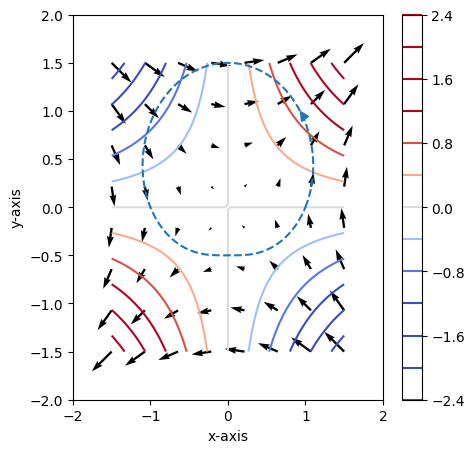

In [25]:
x = y = np.linspace(-1.5,1.5,num=50)
x,y = np.meshgrid(x,y)
theta = t = np.linspace(0,2*np.pi,num=200)

x_g = y_g = np.linspace(-1.5,1.5,num=8)
x_g,y_g = np.meshgrid(x_g,x_g)

g = x*y
G = (G_x, G_y) = (y_g,x_g)

r_x = np.cos(t) + 0.25*np.sin(2*t)
r_y = np.sin(t) + 0.5*np.sin(t)**2

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xlim = ax.set_xlim(-2,2)
ylim = ax.set_ylim(-2,2)

cmap = plt.colormaps['coolwarm']
norm = plt.Normalize(vmin=-1,vmax=1)
cs = ax.contour(x,y,g,cmap=cmap,norm=norm,levels=12)
cb = fig.colorbar(cs)
ax.quiver(x_g,y_g,*G,color='k')
ax.plot(r_x,r_y,color='tab:blue',ls='--')

t_a = 0.25*np.pi
(x_a, y_a) = r(t_a)
mark = mpl.markers.MarkerStyle('>').rotated(rad=alpha)
ax.plot([x_a],[y_a],color='tab:blue',marker=mark)

Now, suppose we have a curve $C$ given by, in polar coordinates:  

$$ r := r(\theta) = 1 + 0.5\sin\theta$$

In $xy$-coordinates, $C$ is given by:  

$$ \sqrt{x^2+y^2} = 1 + \frac{y}{2\sqrt{x^2+y^2}} \quad\therefore\quad y = x^2+y^2 - \sqrt{x^2+y^2} \quad\therefore$$

$$ x^2+y^2 = \big(x^2+y^2\big)^2 + y^2 - 2y\big(x^2+y^2\big)$$

The parameterization of $C$ is:  

$$ \frac{x}{\cos\theta} = 1 + 0.5\sin\theta \quad\therefore\quad x := x(t) = \cos t + 0.25\sin 2t$$

$$ y := y(t) = \sin t + 0.5\sin^2 t$$

$$ \mathbf{r} := \mathbf{r}(t) = \langle x(t), y(t)\rangle$$

In [18]:
def r(t):
    return (np.cos(t) + 0.25*np.sin(2*t),np.sin(t)+0.5*np.sin(t)**2)

In [20]:
r(0.25*np.pi)

(0.9571067811865476, 0.9571067811865475)

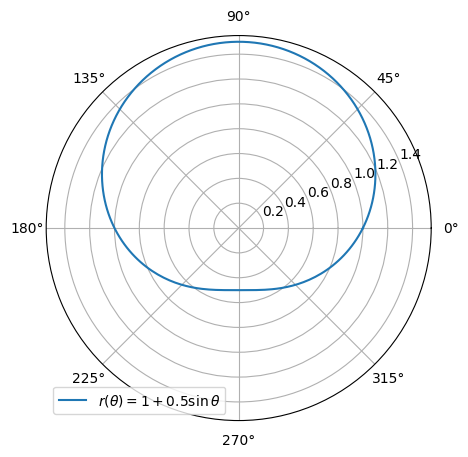

In [3]:
theta = t = np.linspace(0,2*np.pi,num=200)
r = 1 + 0.5*np.sin(theta)

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),figsize=(5,5))

ax.plot(theta,r,color='tab:blue',label=r'$r(\theta) = 1 + 0.5\sin\theta$')
ax.legend()

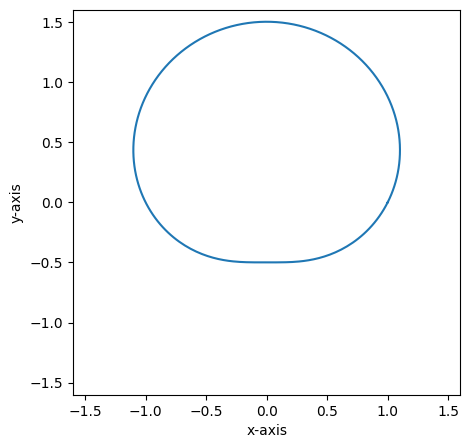

In [6]:
x = np.cos(t) + 0.25*np.sin(2*t)
y = np.sin(t) + 0.5*np.sin(t)**2

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xlim = ax.set_xlim(-1.6,1.6)
ylim = ax.set_ylim(*xlim)

ax.plot(x,y,color='tab:blue')

Now, lets confirm the fundamental theorem of line integrals by computing the following:  

$$ I = \int_C \mathbf{G}\cdot\mathrm{d}\mathbf{r} = \int_C y\,\mathrm{d}x + x\,\mathrm{d}y$$

$$ = \int_C \big(\sin t + 0.5\sin^2 t\big)\,\mathrm{d}x + \big(\cos t + 0.25\sin2t\big)\,\mathrm{d}y$$

First, let's get $\mathbf{G}$ in terms of $t$ along with the differentials found in the above equation.  We of course already have the $x,y$ compliments of $\mathbf{G}$ in terms of $t$ via the parametrization of $C$.  That leaves us with,  

$$ \mathrm{d}x = \big(0.5\cos2t - \sin t\big)\,\mathrm{d}t$$

$$ \mathrm{d}y = \big(\cos t + 0.5\sin2t\big)\,\mathrm{d}t$$

$$ I = \int_0^{2\pi}\Big(\big(\sin t + 0.5\sin^2 t\big)\big(0.5\cos2t - \sin t\big) + \big(\cos t + 0.25\sin2t\big)\big(\cos t + 0.5\sin2t\big)\Big)\,\mathrm{d}t$$

where  

$$ I_1 = 0.5\int_0^{2\pi}\sin t\cos 2t\,\mathrm{d}t - \int_0^{2\pi}\sin^2t\,\mathrm{d}t + 0.25\int_0^{2\pi}\sin^2 t\cos2t\,\mathrm{d}t - 0.5\int_0^{2\pi}\sin^3t\,\mathrm{d}t $$

$$ = I_{1a} - I_{1b} + I_{1c} - I_{1d}$$

$$ I_2 = \int_0^{2\pi}\cos^2t\,\mathrm{d}t + 0.5\int_0^{2\pi}\cos^2t\sin t\,\mathrm{d}t + \frac{1}{8}\int_0^{2\pi}\sin^2 2t\,\mathrm{d}t + \int_0^{2\pi}\cos^2t\sin t\,\mathrm{d}t$$

$$ = \int_0^{2\pi}\cos^2t\,\mathrm{d}t + 1.5\int_0^{2\pi}\cos^2t\sin t\,\mathrm{d}t + \frac{1}{8}\int_0^{2\pi}\sin^2 2t\,\mathrm{d}t$$

$$ = I_{2a} + I_{2b} + I_{2c}$$

To make evaluating the above integrals easier, consider the following:  

$$ \frac{\mathrm{d}\cos^2\theta}{\mathrm{d}t} = \frac{\mathrm{d}\cos^2\theta}{\mathrm{d}\theta}\cdot\theta'(t) = a\frac{\mathrm{d}\cos^2\theta}{\mathrm{d}\theta} = -2a\cos \theta\sin \theta = -a\sin2\theta\quad\quad\text{where }\,\theta := \theta(t) = at$$

$$ -a\int\sin2\theta\,\mathrm{d}t = K + \frac{a\cos2\theta}{2\theta'(t)} $$

Via the above, equivalence principle, and the IVP of $\cos^2 0 = 1$,  

\begin{equation}\tag{1a}
    \cos^2 \theta = 0.5\big(\cos 2\theta + 1\big)
\end{equation}

\begin{equation}\tag{1.1d}
    I_{1d} = 0
\end{equation}

$$ I_{1a} = 0.5\int_0^{2\pi}\sin t\big(2\cos^2 t - 1\big)\,\mathrm{d}t$$

$$ = \int_0^{2\pi}\sin t\cos^2 t\,\mathrm{d}t - 0.5\int_0^{2\pi}\sin t\,\mathrm{d}t$$

\begin{equation}\tag{1.1b}
    I_{1b} = 0.5\int_0^{2\pi}\big(1-\cos2t\big)\,\mathrm{d}t = \int_0^{2\pi}0.5\,\mathrm{d}t = \pi
\end{equation}

$$ I_{1c} = 0.25\int_0^{2\pi}\sin^2 t\big(2\cos^2 t - 1\big)\,\mathrm{d}t$$

$$ =\frac{1}{8}\int_0^{2\pi}\sin^2 2t\,\mathrm{d}t - 0.25I_{1b} = \frac{1}{16}\int_0^{2\pi}\big(1-\cos4t\big)\,\mathrm{d}t - \frac{\pi}{4}$$

\begin{equation}\tag{1.1c}
    = \frac{\pi}{8} - \frac{\pi}{4} = -\frac{\pi}{8}
\end{equation}

\begin{equation}\tag{1.2a}
    I_{2a} = 0 + \int_0^{2\pi} 0.5\,\mathrm{d}t = \pi
\end{equation}

\begin{equation}\tag{1.2b}
    I_{2b} = 0 = \left.-\frac{2.5}{3}\cos^3 t\right]_{\,0}^{\,2\pi}
\end{equation}

$$ I_{2c} = \frac{1}{8}\int_0^{2\pi}0.5\big(1-\cos2t\big)\,\mathrm{d}t$$

\begin{equation}\tag{1.2c}
    = \frac{1}{16}\int_0^{2\pi}\,\mathrm{d}t - 0 = \frac{\pi}{8}
\end{equation}

Of course, the above means:  

$$ \mathbf{v} := \mathbf{v}(t) = \langle v_x(t), v_y(t)\rangle $$

where,  

$$ v_x :=  v_x(t) = 0.5\cos 2t - \sin t \quad\quad\text{and}\quad\quad v_y := v_y(t) = \cos t + 0.5\sin 2t$$

The unit tangent vector is:  

$$ \mathbf{T} := \mathbf{T}(t) = \frac{\mathbf{v}}{|\mathbf{v}|} $$

In [22]:
def v(t):
    return (0.5*np.cos(2*t)-np.sin(t),np.cos(t)+0.5*np.sin(2*t))
def magV(t):
    (v_x,v_y) = v(t)
    return np.sqrt(v_x**2+v_y**2)
def T(t):
    (v_x,v_y) = v(t)
    mV = magV(t)
    return (v_x/mV,v_y/mV)

In [23]:
(T_x, T_y) = T(0.25*np.pi); (T_x,T_y)

(-0.5054494651244236, 0.8628562094610168)

In [24]:
alpha = np.arccos(T_x); np.degrees(alpha)

120.36119340482172

In [ ]:
def R(t):
    return (

## Single Integrals in Polar Coordinates

A circle of radius $a$ is, of course, given by, in rectangular and polar coordinates respectively:  

$$x^2 + y^2 =  a^2 \quad\hat{=}\quad a =r := r(\theta)$$